In [1]:
import torch
import numpy as np
import json
from lime import lime_image
from numba.cpython.slicing import slice_constructor_impl
from skimage.segmentation import quickshift, mark_boundaries, slic
from ultralytics import YOLO
from datasets import load_dataset
from PIL import Image
import matplotlib.pyplot as plt

In [2]:

def transform_image(image):
    """Ensure image is in RGB format."""
    if image.mode != "RGB":
        image = image.convert("RGB")
    return np.array(image)


def yolo_predict(image_np, model):
    """Performs YOLO inference and returns object detection results."""
    if image_np.shape[-1] != 3:
        raise ValueError("Expected an RGB image with shape (H, W, 3)")

    image_pil = Image.fromarray(image_np.astype(np.uint8))  # Ensure proper dtype
    results = model(image_pil)

    if len(results[0].boxes) > 0:
        boxes = results[0].boxes.xyxy.cpu().numpy()  # Bounding box coordinates
        classes = results[0].boxes.cls.cpu().numpy()  # Class IDs
        scores = results[0].boxes.conf.cpu().numpy()  # Confidence scores
        return boxes, classes, scores
    else:
        return [], [], []  # No detections


def surrogate_classifier(images_np, model):
    """Generate a surrogate classifier's output based on detected objects."""
    outputs = []
    for image_np in images_np:
        try:
            boxes, classes, scores = yolo_predict(image_np, model)
            output = np.zeros(len(model.names))  # Initialize output for all classes
            for class_id, score in zip(classes, scores):
                output[int(class_id)] = score  # Assign confidence scores to detected classes
            outputs.append(output)
        except Exception as e:
            print(f"Error processing image: {e}")
            outputs.append(np.zeros(len(model.names)))  # Return zero scores if error
    return np.array(outputs)


Processing image 1/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 199.8ms
Speed: 2.8ms preprocess, 199.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 169.9ms
Speed: 2.4ms preprocess, 169.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 160.6ms
Speed: 2.4ms preprocess, 160.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 139.5ms
Speed: 1.8ms preprocess, 139.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 103.6ms
Speed: 2.7ms preprocess, 103.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 129.1ms
Speed: 1.7ms preprocess, 129.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 126.0ms
Speed: 2.3ms preprocess, 126.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 97.7ms
Speed: 1.5ms preprocess, 97.7ms inferen

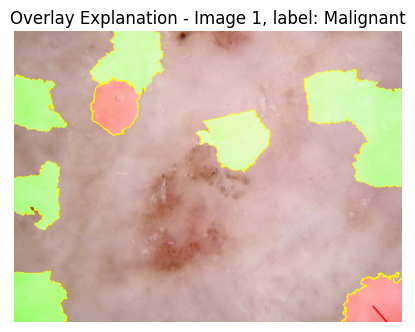

Processing image 5/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 183.5ms
Speed: 2.1ms preprocess, 183.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 174.9ms
Speed: 1.7ms preprocess, 174.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 174.0ms
Speed: 2.6ms preprocess, 174.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 1 Malignant, 162.6ms
Speed: 4.9ms preprocess, 162.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 1 Malignant, 135.7ms
Speed: 3.5ms preprocess, 135.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 103.8ms
Speed: 2.4ms preprocess, 103.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 101.5ms
Speed: 2.0ms preprocess, 101.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 111.2ms
Speed: 1.8ms preprocess, 1

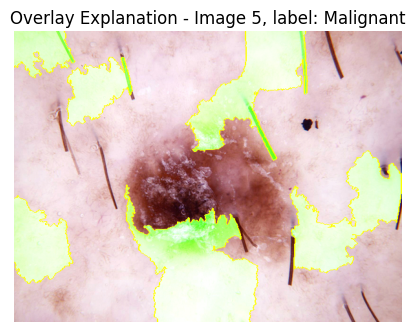

Processing image 13/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 2 Malignants, 211.3ms
Speed: 1.7ms preprocess, 211.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 132.2ms
Speed: 1.8ms preprocess, 132.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 153.1ms
Speed: 2.6ms preprocess, 153.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 125.6ms
Speed: 1.6ms preprocess, 125.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 107.1ms
Speed: 1.6ms preprocess, 107.1ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 131.2ms
Speed: 2.2ms preprocess, 131.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 171.1ms
Speed: 3.6ms preprocess, 171.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 121.0ms
Speed: 2.3ms preprocess, 121.0ms inferen

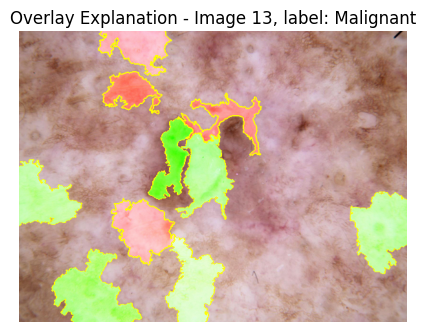

Processing image 15/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 168.0ms
Speed: 2.2ms preprocess, 168.0ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 168.1ms
Speed: 1.7ms preprocess, 168.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 178.1ms
Speed: 3.9ms preprocess, 178.1ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 168.4ms
Speed: 2.1ms preprocess, 168.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 132.7ms
Speed: 2.5ms preprocess, 132.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 1 Malignant, 135.7ms
Speed: 2.2ms preprocess, 135.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 108.7ms
Speed: 2.1ms preprocess, 108.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 116.5ms
Speed: 4.0ms preprocess, 116.5ms infere

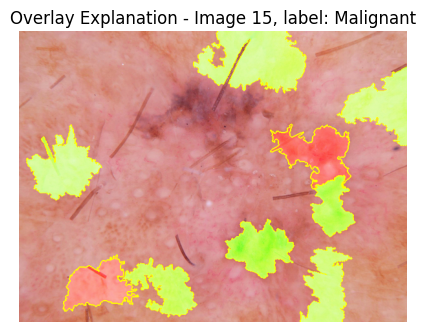

Processing image 18/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 176.7ms
Speed: 1.7ms preprocess, 176.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 159.4ms
Speed: 2.3ms preprocess, 159.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 1 Malignant, 104.5ms
Speed: 1.7ms preprocess, 104.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 150.1ms
Speed: 1.5ms preprocess, 150.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 139.9ms
Speed: 3.9ms preprocess, 139.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 111.6ms
Speed: 1.9ms preprocess, 111.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 1 Malignant, 108.2ms
Speed: 3.8ms preprocess, 108.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 98.4ms
Speed: 1.5ms preprocess, 

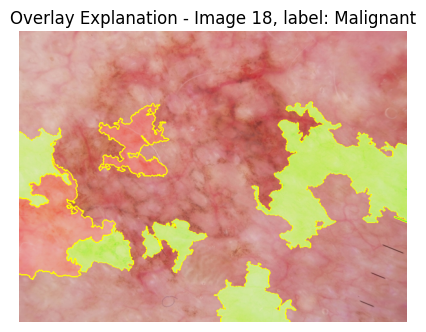

Processing image 19/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Benign, 1 Malignant, 175.6ms
Speed: 1.7ms preprocess, 175.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 170.1ms
Speed: 2.0ms preprocess, 170.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 159.2ms
Speed: 3.2ms preprocess, 159.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 167.6ms
Speed: 1.8ms preprocess, 167.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 144.9ms
Speed: 2.7ms preprocess, 144.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 120.4ms
Speed: 2.4ms preprocess, 120.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 111.8ms
Speed: 1.9ms preprocess, 111.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 135.7ms
Speed: 1.8ms preprocess

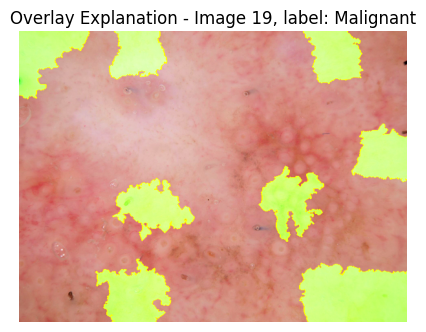

Processing image 20/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 172.6ms
Speed: 1.8ms preprocess, 172.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 185.7ms
Speed: 3.9ms preprocess, 185.7ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 190.2ms
Speed: 3.8ms preprocess, 190.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 153.4ms
Speed: 2.1ms preprocess, 153.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 107.0ms
Speed: 1.8ms preprocess, 107.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 106.7ms
Speed: 2.4ms preprocess, 106.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 116.7ms
Speed: 2.2ms preprocess, 116.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 83.2ms
Speed: 1.8ms preprocess, 83.2ms inference, 0.7ms

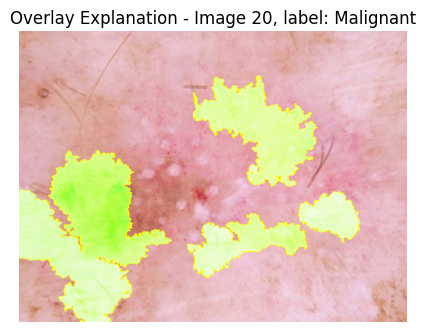

Processing image 22/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 167.2ms
Speed: 1.7ms preprocess, 167.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 164.1ms
Speed: 1.7ms preprocess, 164.1ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 1 Malignant, 160.4ms
Speed: 1.7ms preprocess, 160.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 122.7ms
Speed: 1.8ms preprocess, 122.7ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 93.4ms
Speed: 1.6ms preprocess, 93.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 142.2ms
Speed: 1.5ms preprocess, 142.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 127.2ms
Speed: 1.7ms preprocess, 127.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 123.5ms
Speed: 1.6ms preprocess, 123.5

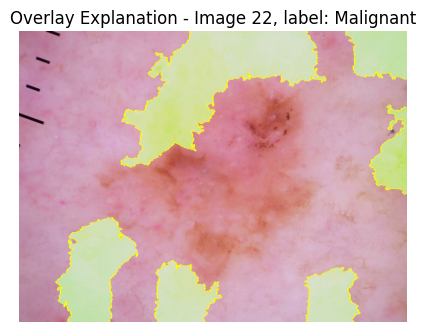

Processing image 23/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 184.3ms
Speed: 3.3ms preprocess, 184.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 207.5ms
Speed: 1.7ms preprocess, 207.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 175.3ms
Speed: 1.8ms preprocess, 175.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 143.2ms
Speed: 3.6ms preprocess, 143.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 187.6ms
Speed: 4.2ms preprocess, 187.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 184.7ms
Speed: 4.6ms preprocess, 184.7ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 139.3ms
Speed: 2.9ms preprocess, 139.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 113.9ms
Speed: 2.8ms preprocess, 113.9ms inference, 0.7ms postpro

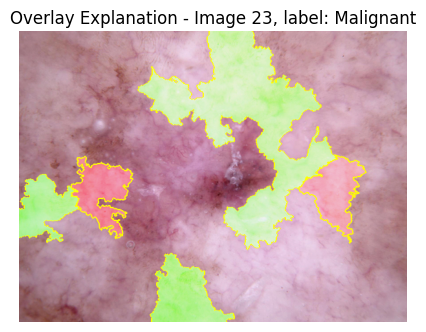

Processing image 26/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Benign, 1 Malignant, 195.9ms
Speed: 6.8ms preprocess, 195.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 188.8ms
Speed: 3.7ms preprocess, 188.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 192.6ms
Speed: 2.1ms preprocess, 192.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 193.5ms
Speed: 4.2ms preprocess, 193.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 165.1ms
Speed: 1.9ms preprocess, 165.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 135.2ms
Speed: 1.6ms preprocess, 135.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 137.7ms
Speed: 1.7ms preprocess, 137.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 1 Malignant, 104.6ms
Speed: 4.5

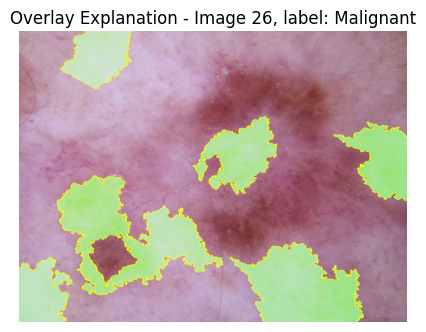

Processing image 30/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 173.1ms
Speed: 1.9ms preprocess, 173.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 188.4ms
Speed: 3.6ms preprocess, 188.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 179.6ms
Speed: 3.6ms preprocess, 179.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 148.0ms
Speed: 2.8ms preprocess, 148.0ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 120.3ms
Speed: 2.0ms preprocess, 120.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 104.1ms
Speed: 2.0ms preprocess, 104.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 102.1ms
Speed: 2.2ms preprocess, 102.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 101.9ms
Speed: 1.8ms preprocess, 101.9ms inference, 0.6m

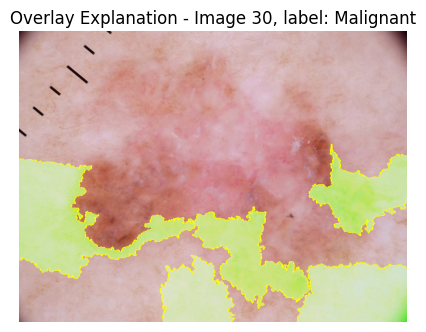

Processing image 31/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 178.6ms
Speed: 1.3ms preprocess, 178.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 181.8ms
Speed: 1.8ms preprocess, 181.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 162.4ms
Speed: 1.7ms preprocess, 162.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 128.7ms
Speed: 2.4ms preprocess, 128.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 149.6ms
Speed: 1.5ms preprocess, 149.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 185.9ms
Speed: 3.2ms preprocess, 185.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 201.4ms
Speed: 1.8ms preprocess, 201.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 144.6ms
Speed: 3.9ms preprocess, 144.

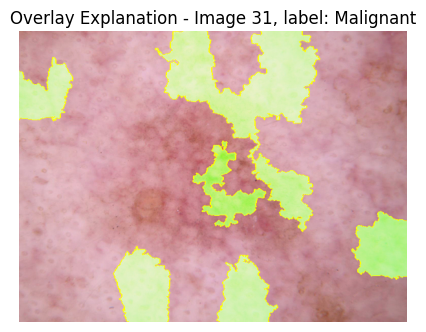

Processing image 32/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 179.7ms
Speed: 1.7ms preprocess, 179.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 190.6ms
Speed: 4.0ms preprocess, 190.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 171.1ms
Speed: 4.2ms preprocess, 171.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 139.3ms
Speed: 2.0ms preprocess, 139.3ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 125.6ms
Speed: 1.6ms preprocess, 125.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 133.8ms
Speed: 2.1ms preprocess, 133.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 119.5ms
Speed: 2.0ms preprocess, 119.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 119.3ms
Speed: 1.8ms preprocess, 119.3ms inferenc

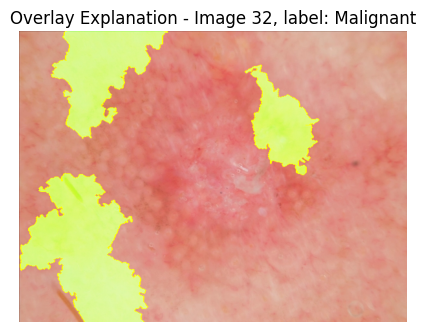

Processing image 36/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Benign, 1 Malignant, 195.7ms
Speed: 3.2ms preprocess, 195.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 178.6ms
Speed: 1.6ms preprocess, 178.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 172.5ms
Speed: 4.6ms preprocess, 172.5ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 175.5ms
Speed: 3.7ms preprocess, 175.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 133.6ms
Speed: 2.4ms preprocess, 133.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 100.8ms
Speed: 2.2ms preprocess, 100.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 89.8ms
Speed: 1.7ms preprocess, 89.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 87.4ms
Speed: 1.7ms preprocess, 87.4ms infer

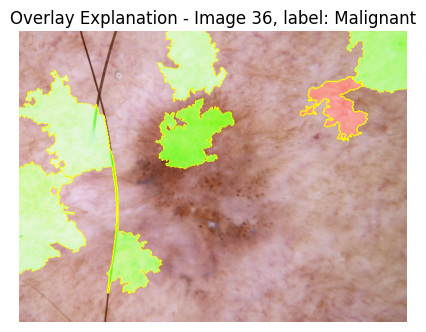

Processing image 37/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Benign, 1 Malignant, 194.3ms
Speed: 1.8ms preprocess, 194.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 180.4ms
Speed: 1.9ms preprocess, 180.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 110.8ms
Speed: 1.8ms preprocess, 110.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 1 Malignant, 162.5ms
Speed: 2.4ms preprocess, 162.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 138.6ms
Speed: 2.9ms preprocess, 138.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 103.2ms
Speed: 1.8ms preprocess, 103.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 1 Malignant, 130.8ms
Speed: 2.1ms preprocess, 130.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 111.1ms
Speed: 2.3ms prepr

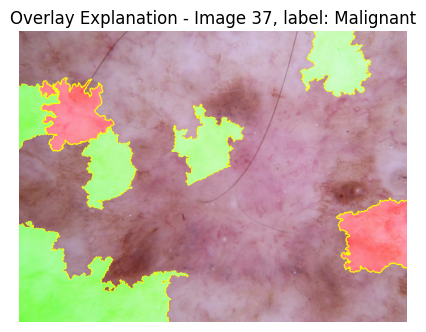

Processing image 38/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Benign, 1 Malignant, 170.1ms
Speed: 1.4ms preprocess, 170.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 136.4ms
Speed: 3.6ms preprocess, 136.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 1 Malignant, 105.7ms
Speed: 2.1ms preprocess, 105.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 191.9ms
Speed: 4.2ms preprocess, 191.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 203.3ms
Speed: 3.8ms preprocess, 203.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 144.6ms
Speed: 3.1ms preprocess, 144.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 123.1ms
Speed: 2.6ms preprocess, 123.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 104.7ms
Speed: 1.7ms preprocess, 104.7m

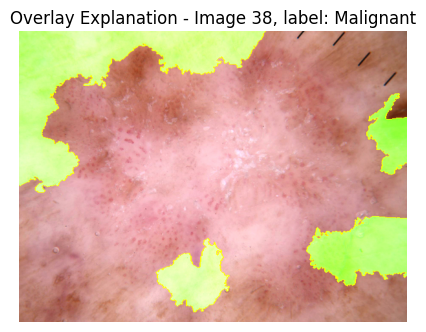

Processing image 43/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 181.3ms
Speed: 2.1ms preprocess, 181.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 188.9ms
Speed: 3.7ms preprocess, 188.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 182.6ms
Speed: 4.0ms preprocess, 182.6ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 153.7ms
Speed: 2.2ms preprocess, 153.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 131.5ms
Speed: 2.4ms preprocess, 131.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 116.2ms
Speed: 4.8ms preprocess, 116.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 100.6ms
Speed: 5.1ms preprocess, 100.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 157.7ms
Speed: 4.8ms preprocess, 157.

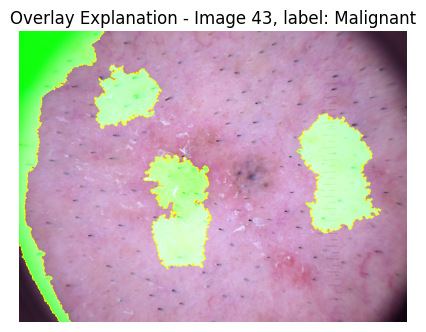

Processing image 44/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 171.9ms
Speed: 2.0ms preprocess, 171.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 143.5ms
Speed: 2.4ms preprocess, 143.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 136.1ms
Speed: 2.9ms preprocess, 136.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 123.6ms
Speed: 1.9ms preprocess, 123.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 119.6ms
Speed: 1.8ms preprocess, 119.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 128.9ms
Speed: 9.8ms preprocess, 128.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 99.5ms
Speed: 1.9ms preprocess, 99.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 120.4ms
Speed: 3.0ms preprocess,

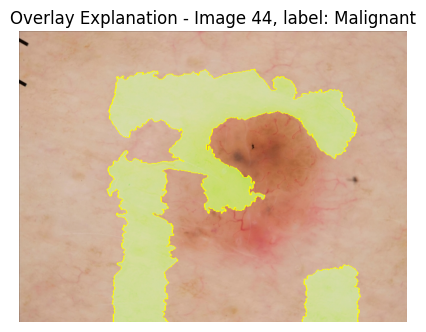

Processing image 45/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 187.6ms
Speed: 3.0ms preprocess, 187.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 186.6ms
Speed: 3.8ms preprocess, 186.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 Benigns, 167.4ms
Speed: 1.9ms preprocess, 167.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 140.6ms
Speed: 1.6ms preprocess, 140.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 107.8ms
Speed: 1.8ms preprocess, 107.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 111.3ms
Speed: 1.9ms preprocess, 111.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 130.2ms
Speed: 1.9ms preprocess, 130.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 109.5ms
Speed: 1.8ms preprocess, 109.5ms inference, 0.9ms post

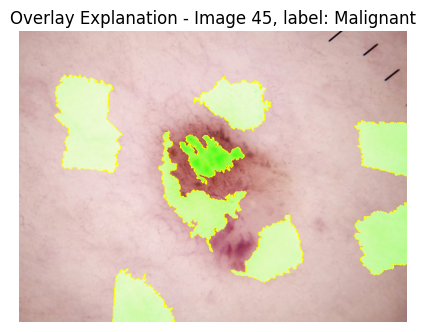

Processing image 47/10


  0%|          | 0/10 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 181.1ms
Speed: 3.0ms preprocess, 181.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 162.5ms
Speed: 1.8ms preprocess, 162.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 132.4ms
Speed: 1.8ms preprocess, 132.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 113.4ms
Speed: 1.9ms preprocess, 113.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 193.3ms
Speed: 2.3ms preprocess, 193.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 136.0ms
Speed: 2.2ms preprocess, 136.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 108.8ms
Speed: 1.8ms preprocess, 108.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 151.2ms
Speed: 2.7ms preprocess, 151.

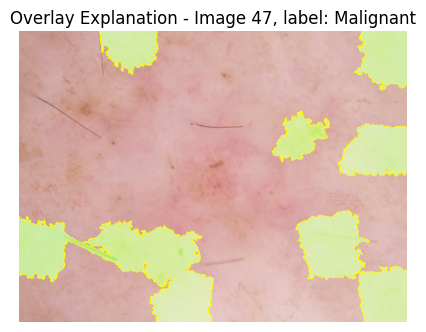

Done


In [3]:

label_mapping = {
    "melanoma": "Malignant",
    "melanocytic_Nevi": "Malignant",
    "dermatofibroma": "Benign",
    "basal_cell_carcinoma": "Malignant",
    "vascular_lesions": "Benign",
    "actinic_keratoses": "Malignant",
    "benign_keratosis-like_lesions": "Benign"
}
# Load the dataset
dataset = load_dataset("marmal88/skin_cancer")
test_split = dataset["test"]

# Load the YOLO model
model = YOLO("yolo_weights/yolov8SC.pt")  # Replace with your model path

true_positives = [0, 4, 12, 14, 17, 18, 19, 21, 22, 25, 29, 30, 31, 35, 36, 37, 42, 43, 44, 46]
# Process and explain 10 images
for index in true_positives:
    print(f"Processing image {index + 1}/10")
    image = test_split[index]["image"]
    ground_truth = test_split[index]["dx"]
    truth = label_mapping[ground_truth]

    # Transform image for SODEx
    image_np = transform_image(image)

    # Initialize LIME explainer
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(
        image_np,
        lambda x: surrogate_classifier(x, model),
        top_labels=2,
        hide_color=0,
        num_samples=10,
        # segmentation_fn=lambda x: quickshift(x, kernel_size=4, max_dist=200)
        segmentation_fn=lambda x: slic(x, n_segments=50, compactness=10)
    )

    # Get explanation mask
    image_explained, mask = explanation.get_image_and_mask(
        explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False
    )
    image_explained2, mask2 = explanation.get_image_and_mask(
        explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False
    )

    # Overlay the explanation mask onto the original image
    overlay = mark_boundaries(image_explained2, mask2)

    # Plot only the overlay explanation
    plt.figure(figsize=(5, 5))
    plt.imshow(overlay)
    plt.title(f"Overlay Explanation - Image {index + 1}, label: {truth}")
    plt.axis("off")
    plt.show()
print("Done")